<a href="https://colab.research.google.com/github/Hemanth9336/Analyzing-Feature-Selection-Techniques-for-Machine-Learning-Based-Anomaly-Detection-in-IOT-System.-/blob/main/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Load the data
df1 = pd.read_csv('/content/Tuesday-WorkingHours.pcap_ISCX.csv')
df2 = pd.read_csv('/content/Wednesday-workingHours.pcap_ISCX.csv')
df3 = pd.read_csv('/content/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')

## Reading the data

In [ ]:
#Combining of three Dataframes into one Dataframe 
frames = [df1,df2,df3]
df = pd.concat(frames)

In [ ]:
#It gives an overview about a Dataframe columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70210 entries, 0 to 24065
Data columns (total 79 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0    Destination Port             70210 non-null  int64  
 1    Flow Duration                70210 non-null  int64  
 2    Total Fwd Packets            70210 non-null  int64  
 3    Total Backward Packets       70210 non-null  int64  
 4   Total Length of Fwd Packets   70210 non-null  int64  
 5    Total Length of Bwd Packets  70210 non-null  int64  
 6    Fwd Packet Length Max        70210 non-null  int64  
 7    Fwd Packet Length Min        70210 non-null  int64  
 8    Fwd Packet Length Mean       70210 non-null  float64
 9    Fwd Packet Length Std        70210 non-null  float64
 10  Bwd Packet Length Max         70210 non-null  int64  
 11   Bwd Packet Length Min        70210 non-null  int64  
 12   Bwd Packet Length Mean       70210 non-null  float64
 13   

In [ ]:
#By default the head function returns the first 5 rows
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,88,640,7,4,440,358,220,0,62.857143,107.349008,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,88,900,9,4,600,2944,300,0,66.666667,132.287566,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,88,1205,7,4,2776,2830,1388,0,396.571429,677.274651,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,88,511,7,4,452,370,226,0,64.571429,110.276708,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,88,773,9,4,612,2944,306,0,68.000000,134.933317,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [ ]:
#By default the tail function returns the first 5 rows
df.tail()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
24061,443,5297357,8,6,698,3825,517,0,87.250000,178.633503,...,20.0,149326.0,0.0,149326.0,149326.0,5147982.0,0.0,5147982.0,5147982.0,BENIGN
24062,80,5608833,3,1,0,0,0,0,0.000000,0.000000,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Web Attack � Brute Force
24063,80,5740447,3,1,12,0,6,0,4.000000,3.464102,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
24064,443,5749619,7,5,343,159,229,0,49.000000,82.251646,...,20.0,120047.0,0.0,120047.0,120047.0,5629568.0,0.0,5629568.0,5629568.0,BENIGN
24065,443,5915749,6,3,611,143,517,0,101.833333,204.305082,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Count the number of rows and column in the data set
df.shape

(70210, 79)

In [ ]:
#Explore the data
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [ ]:
#It calculates some basic statistical details
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,70210.000000,7.021000e+04,70210.000000,70210.000000,7.021000e+04,7.021000e+04,70210.000000,70210.000000,70210.000000,70210.000000,...,70207.000000,7.020700e+04,7.020700e+04,7.020700e+04,7.020700e+04,7.020700e+04,7.020700e+04,7.020700e+04,7.020700e+04,7.020700e+04
mean,6165.821464,1.889691e+07,82.332887,106.544025,1.075243e+03,2.266789e+05,248.220724,18.802250,59.789792,75.570362,...,49.354039,-3.821026e+04,1.311986e+05,8.100960e+04,2.853397e+05,8.763748e+04,6.578757e+06,2.274298e+05,6.749731e+06,6.342761e+06
std,15933.141092,3.672391e+07,3467.241936,4637.672477,1.767742e+04,1.033176e+07,684.469157,43.818223,129.178653,190.065771,...,2730.373195,4.530562e+06,8.969106e+05,4.891642e+05,1.415271e+06,8.241721e+05,1.739078e+07,2.427402e+06,1.773865e+07,1.724329e+07
min,0.000000,-1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,53.000000,2.660000e+02,2.000000,1.000000,3.100000e+01,0.000000e+00,24.000000,0.000000,10.333333,0.000000,...,0.000000,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,7.175200e+04,2.000000,2.000000,7.800000e+01,1.380000e+02,48.000000,0.000000,42.111111,0.000000,...,1.000000,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,443.000000,8.132607e+06,8.000000,6.000000,4.960000e+02,8.600000e+02,316.000000,41.000000,57.000000,90.545893,...,3.000000,3.200000e+01,1.555000e+02,0.000000e+00,1.590000e+02,8.700000e+01,5.083038e+06,0.000000e+00,5.083038e+06,5.043264e+06
max,64287.000000,1.200000e+08,206446.000000,276072.000000,1.224076e+06,6.270000e+08,24820.000000,1472.000000,4640.757576,6429.190773,...,197124.000000,6.000000e+01,1.070000e+08,1.590000e+07,1.070000e+08,1.070000e+08,1.200000e+08,7.590000e+07,1.200000e+08,1.200000e+08


## Preprocessing the data

In [ ]:
#It shows how many unique values are there in every column
df.nunique()

 Destination Port               5749
 Flow Duration                 46095
 Total Fwd Packets               448
 Total Backward Packets          508
Total Length of Fwd Packets     4821
                               ...  
Idle Mean                       8106
 Idle Std                       9786
 Idle Max                       4473
 Idle Min                      10089
 Label                             4
Length: 79, dtype: int64

In [ ]:
#It will check if any value is NaN in a Dataframe
np.isnan(df.any())

 Destination Port              False
 Flow Duration                 False
 Total Fwd Packets             False
 Total Backward Packets        False
Total Length of Fwd Packets    False
                               ...  
Idle Mean                      False
 Idle Std                      False
 Idle Max                      False
 Idle Min                      False
 Label                         False
Length: 79, dtype: bool

In [ ]:
#The function tests element-wise whether it is finite or not and return the result as a boolean array.
np.isfinite(df.all())

 Destination Port              True
 Flow Duration                 True
 Total Fwd Packets             True
 Total Backward Packets        True
Total Length of Fwd Packets    True
                               ... 
Idle Mean                      True
 Idle Std                      True
 Idle Max                      True
 Idle Min                      True
 Label                         True
Length: 79, dtype: bool

In [ ]:
#It will replace NaN values by Zeroes in a column of a Dataframe
df = df.fillna(0)

In [ ]:
#It will remove nan and inf values in a Dataframe
df =df[~df.isin([np.nan, np.inf]).any(1)]

In [ ]:
#Renaming the Dataframe column from Label to Attacks
df.rename({' Label':'Attacks'},axis=1,inplace=True)

In [ ]:
#Returns a list of unique values
print(df['Attacks'].unique()) 

['BENIGN' 'FTP-Patator' 0 'DoS slowloris' 'Web Attack � Brute Force']


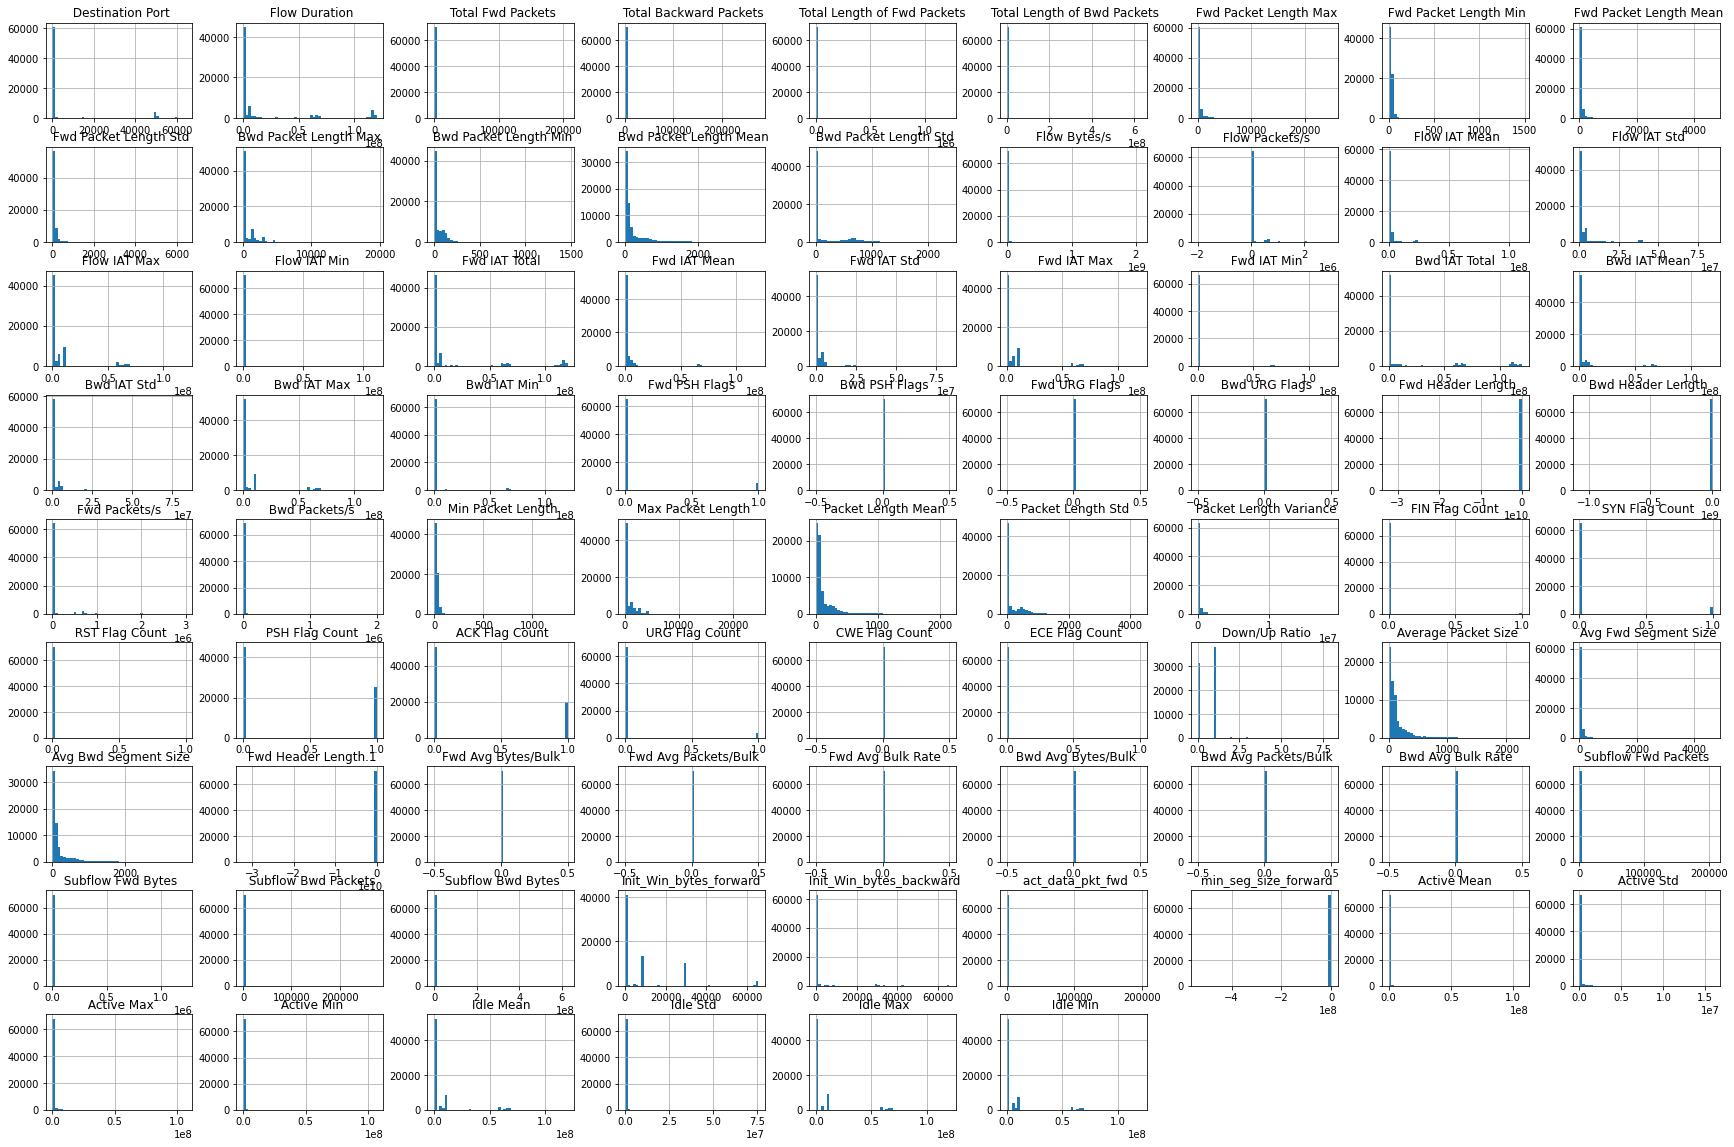

In [ ]:
#dataframe Visualization
#We can plot histogram only for numerical attributres
df.hist(bins=50, figsize=(30,20))
plt.show()

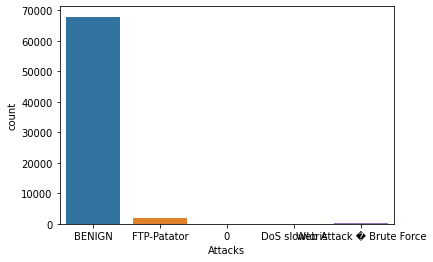

In [ ]:
sns.countplot(df['Attacks'])

In [ ]:
#Return the data types of each column in the DataFrame.
df.dtypes

 Destination Port                int64
 Flow Duration                   int64
 Total Fwd Packets               int64
 Total Backward Packets          int64
Total Length of Fwd Packets      int64
                                ...   
Idle Mean                      float64
 Idle Std                      float64
 Idle Max                      float64
 Idle Min                      float64
Attacks                         object
Length: 79, dtype: object

## Feature engineering

In [ ]:
from sklearn.preprocessing import LabelEncoder
Attacks_encoder = LabelEncoder()
df['Attacks']=Attacks_encoder.fit_transform(df['Attacks'].astype(str))

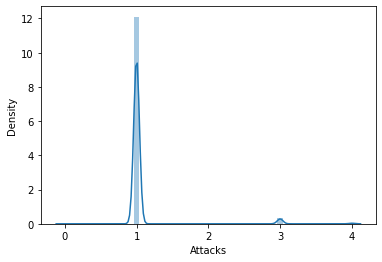

In [ ]:
sns.distplot(df['Attacks'])

## Splitting the data

In [ ]:
#Split the data set into independent (X) and dependent (Y) data sets 
# X --> contains the dataframe without the target i.e price
X = df.drop('Attacks',axis=1)
# Y --> contains only the target value 
Y = df['Attacks']

In [ ]:
#Split the data set into 75% training and 25% testing 
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size = 0.25, random_state= 0)

In [ ]:
X_train = X_train.copy()
Y_train = Y_train.copy()
X_test = X_test.copy()
Y_test = Y_test.copy()

In [ ]:
X_train.shape,Y_train.shape

((52597, 78), (52597,))

In [ ]:
X_test.shape,Y_test.shape

((17533, 78), (17533,))

## Feature Selection

### Variance Threshold

In [ ]:
# it will remove zero variance features
from sklearn.feature_selection import VarianceThreshold
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(df)

VarianceThreshold(threshold=0)

In [ ]:
#Getting all number of columns that have constant values
constant_columns = [column for column in df.columns
                    if column not in df.columns[var_thres.get_support()]]

print(len(constant_columns))

10


In [ ]:
#Dropping constant_columns from the Dataframe
df.drop(constant_columns,axis=1,inplace=True)

In [ ]:
#Returning the columns that are having constant values
for feature in constant_columns:
  print(feature)

 Bwd PSH Flags
 Fwd URG Flags
 Bwd URG Flags
 CWE Flag Count
Fwd Avg Bytes/Bulk
 Fwd Avg Packets/Bulk
 Fwd Avg Bulk Rate
 Bwd Avg Bytes/Bulk
 Bwd Avg Packets/Bulk
Bwd Avg Bulk Rate


### Feature Importance

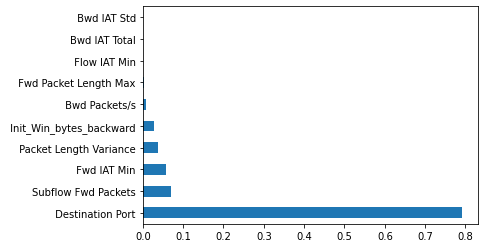

In [ ]:
# decision tree for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X_train, Y_train)
# get importance
importance = pd.Series(model.feature_importances_,index=X.columns)
# plot feature importance
importance.nlargest(10).plot(kind='barh')
pyplot.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# Create Decision Tree classifer object
model = DecisionTreeClassifier()
# Train Decision Tree Classifer
model = model.fit(X_train,Y_train)
#Predict the response for test dataset
y_pred = model.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Decision Tree Training Accuracy: ",metrics.accuracy_score(Y_test, y_pred))

Decision Tree Training Accuracy:  0.9998288940854388


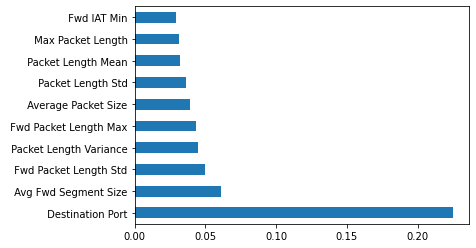

In [ ]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define the model
model = RandomForestClassifier()
model.fit(X_train,Y_train)
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
pyplot.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# classify using random forest classifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
# print the accuracy
print('Random Forest Training Accuracy : ' + str(accuracy_score(Y_test, y_pred)))

Random Forest Training Accuracy : 0.9834597615924258


###Correlation Matrix with Heatmap

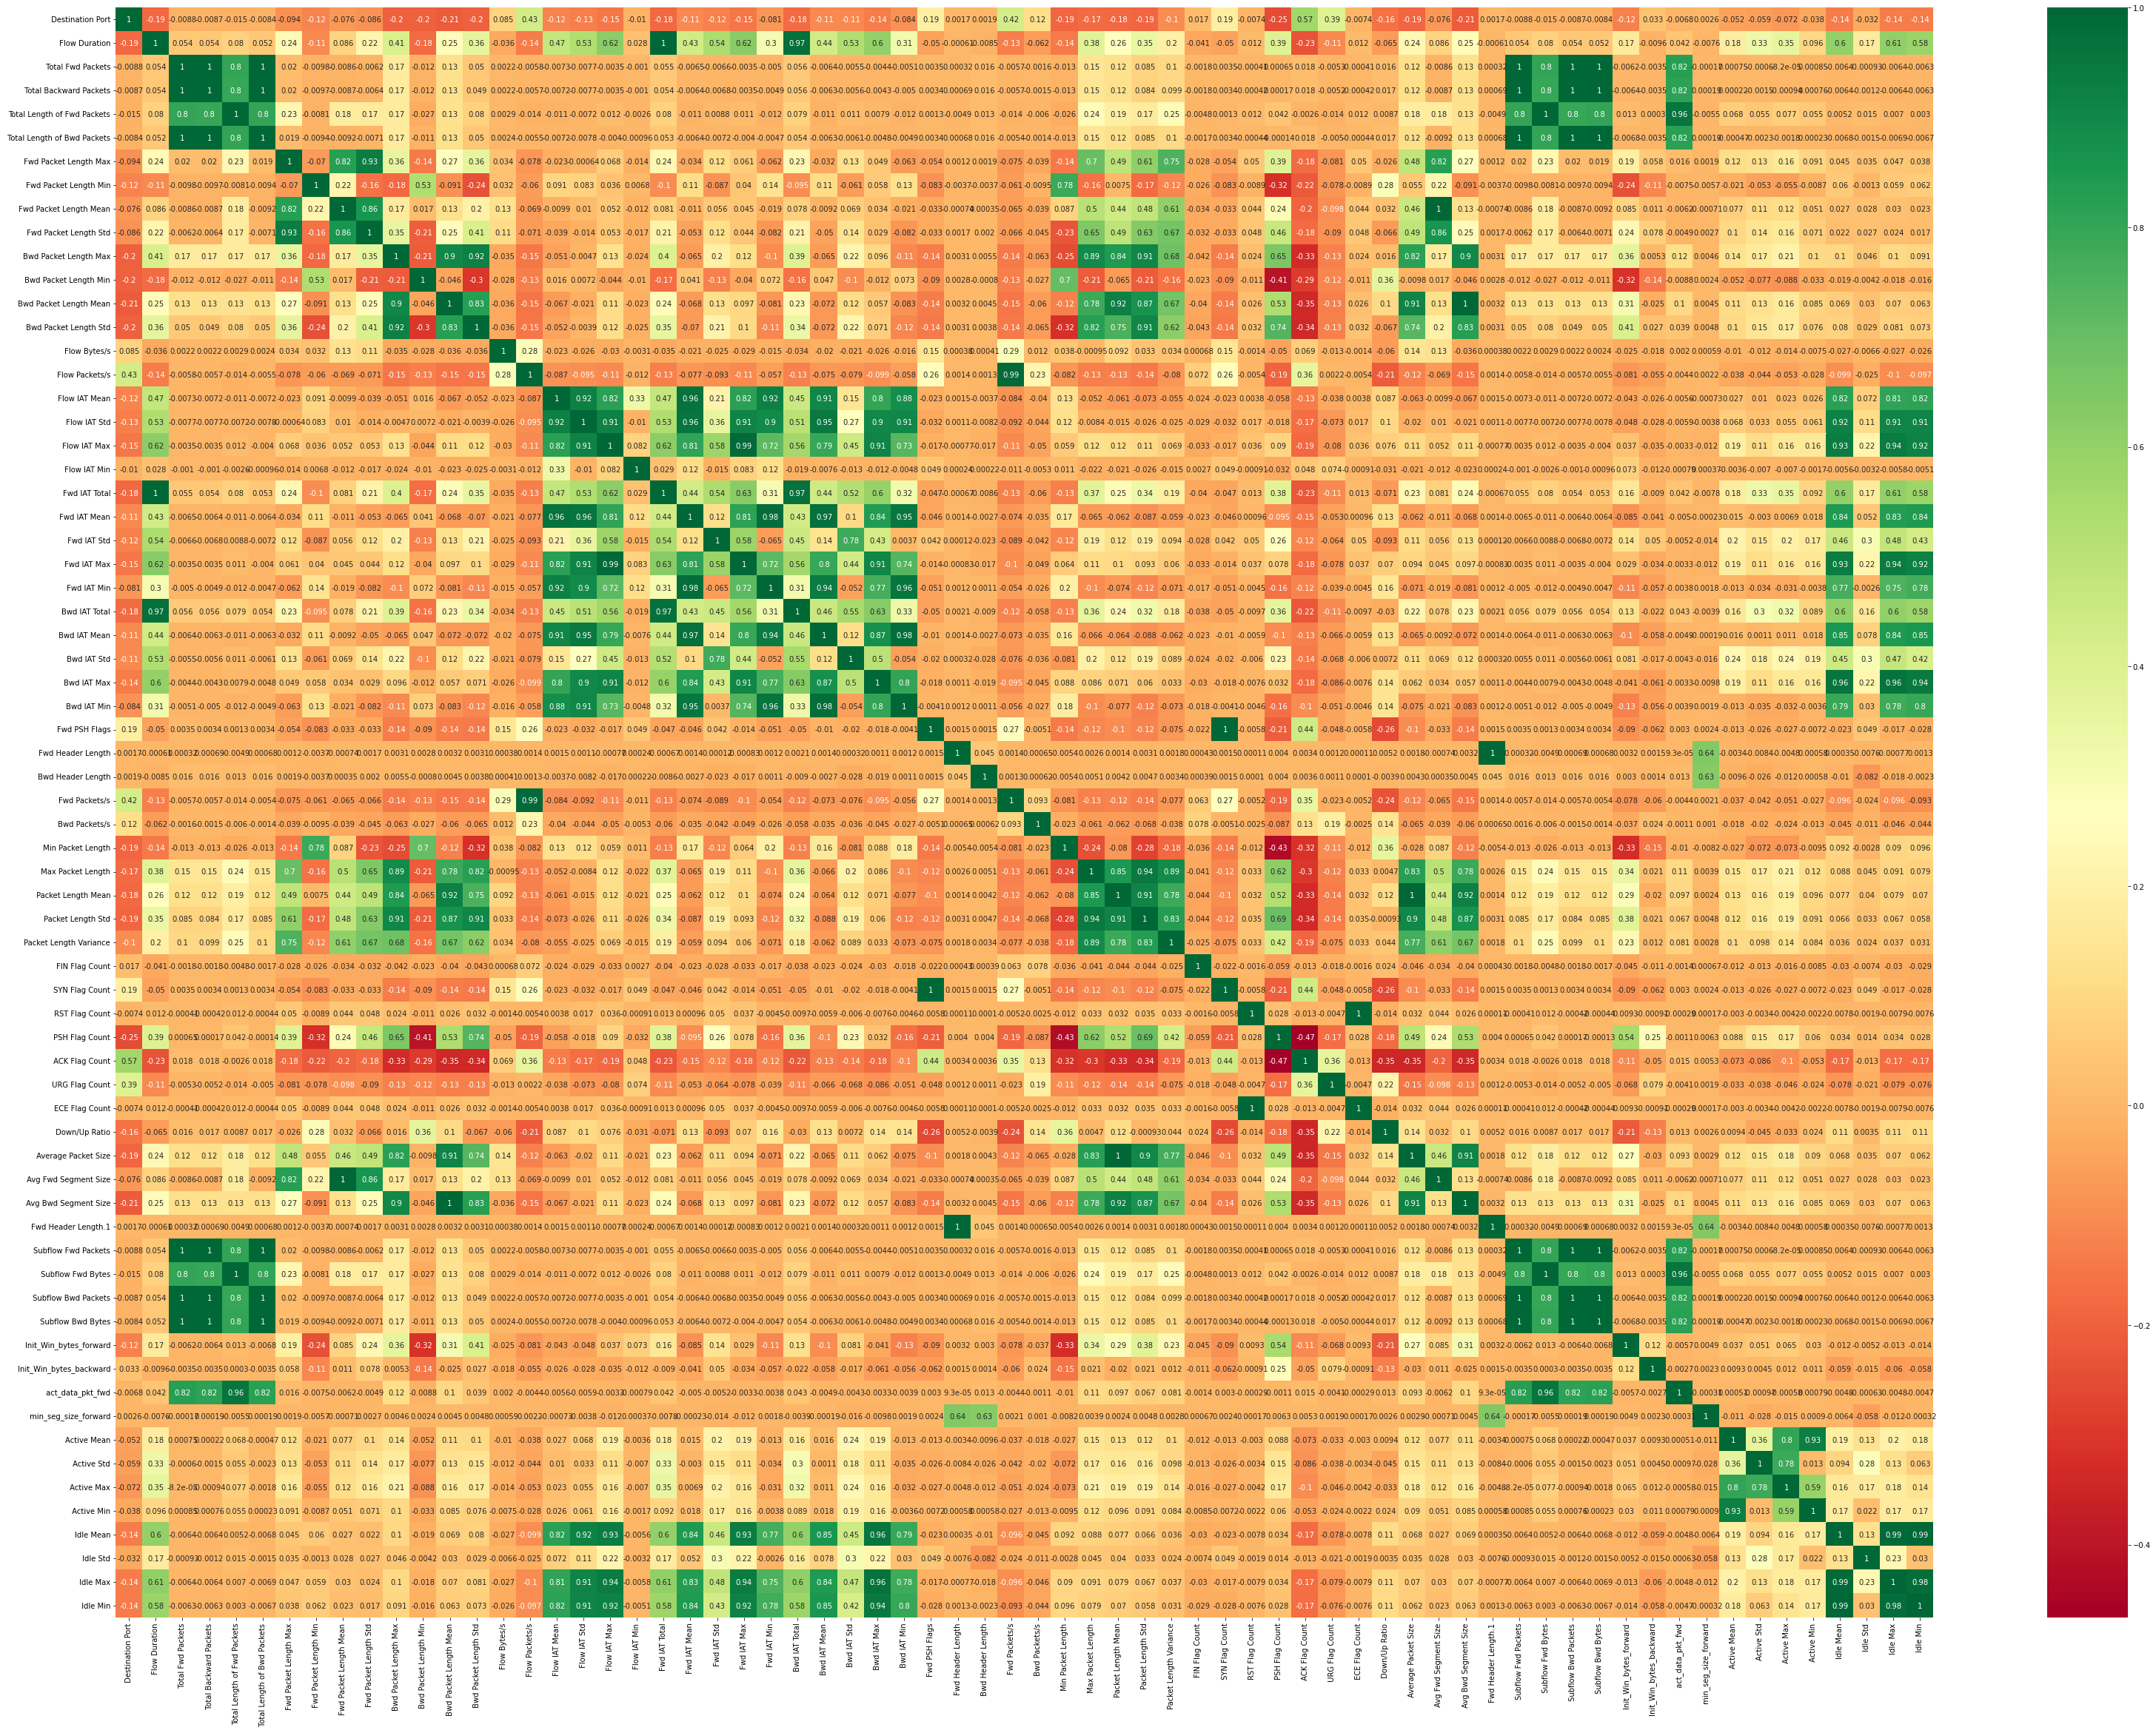

In [ ]:
#get correlations of each features in dataset
corrmat = df.iloc[:,:-1].corr()
top_corr_features = corrmat.index
plt.figure(figsize=(55,40))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(df, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X_train, 0.85)
len(set(corr_features))

35

In [ ]:
corr_features

{' Active Min',
 ' Average Packet Size',
 ' Avg Bwd Segment Size',
 ' Avg Fwd Segment Size',
 ' Bwd IAT Max',
 ' Bwd IAT Mean',
 ' Bwd IAT Min',
 ' Bwd Packet Length Mean',
 ' Bwd Packet Length Std',
 ' ECE Flag Count',
 ' Flow IAT Max',
 ' Flow IAT Std',
 ' Fwd Header Length.1',
 ' Fwd IAT Max',
 ' Fwd IAT Mean',
 ' Fwd IAT Min',
 ' Fwd Packet Length Std',
 ' Idle Max',
 ' Idle Min',
 ' Max Packet Length',
 ' Packet Length Mean',
 ' Packet Length Std',
 ' Packet Length Variance',
 ' SYN Flag Count',
 ' Subflow Bwd Bytes',
 ' Subflow Bwd Packets',
 ' Subflow Fwd Bytes',
 ' Total Backward Packets',
 ' Total Length of Bwd Packets',
 ' act_data_pkt_fwd',
 'Bwd IAT Total',
 'Fwd IAT Total',
 'Fwd Packets/s',
 'Idle Mean',
 'Subflow Fwd Packets'}

In [ ]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

## Feature Extraction

###Principal Component Analysis(PCA)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df)

StandardScaler()

In [ ]:
scaled_data=scaler.transform(df)
scaled_data

array([[-0.38073022, -0.51492432, -0.02174142, ..., -0.38075162,
        -0.36807126, -0.17935819],
       [-0.38073022, -0.51491725, -0.02116492, ..., -0.38075162,
        -0.36807126, -0.17935819],
       [-0.38073022, -0.51490895, -0.02174142, ..., -0.38075162,
        -0.36807126, -0.17935819],
       ...,
       [-0.38123306, -0.3586925 , -0.02289443, ..., -0.38075162,
        -0.36807126, -0.17935819],
       [-0.35841652, -0.35844285, -0.02174142, ..., -0.06353657,
        -0.04174499, -0.17935819],
       [-0.35841652, -0.35392095, -0.02202967, ..., -0.38075162,
        -0.36807126, -2.85846143]])

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [ ]:
x_pca=pca.transform(scaled_data)

In [ ]:
scaled_data.shape

(70130, 69)

In [ ]:
x_pca.shape

(70130, 2)

In [ ]:
x_pca

array([[-1.43631724,  0.38878127],
       [ 0.19335055,  3.14376053],
       [ 1.35836627,  5.18771646],
       ...,
       [-1.35138189, -0.52696208],
       [-0.99697889, -0.06553593],
       [-1.74096465, -0.30221312]])

Text(0, 0.5, 'Second principle component')

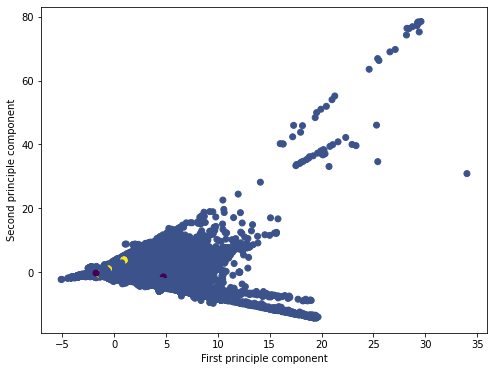

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['Attacks'])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
# define model
model = DummyClassifier(strategy='most_frequent')
# fit model
model.fit(x_pca, Y)
# make predictions
y = model.predict(x_pca)
# calculate accuracy
accuracy = accuracy_score(Y, y)
print('Naive Bayes Classifier Training Accuracy: %.3f' % accuracy)

Naive Bayes Classifier Training Accuracy: 0.968


In [ ]:
from sklearn.linear_model import LogisticRegression 
log = LogisticRegression(random_state=0,solver='lbfgs')
log.fit(x_pca, Y)
# print the accuracy
print('Logistic Regression Training Accuracy: ', log.score (x_pca, Y))

Logistic Regression Training Accuracy:  0.9680878368743762


### Linear Discriminant Analysis

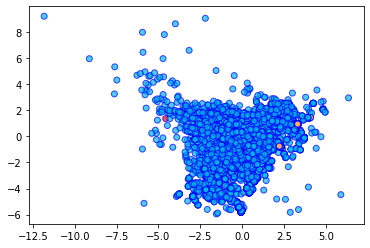

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
 
# apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_train = lda.fit_transform(X_train, Y_train)
X_test = lda.transform(X_test)

# plot the scatterplot
plt.scatter(
    X_train[:,0],X_train[:,1],c=Y_train,cmap='rainbow',
  alpha=0.7,edgecolors='b'
)

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression 
log = LogisticRegression(random_state=0,solver='lbfgs')
log.fit(X_train, Y_train)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)

# print the accuracy
print('Logistic Regression Training Accuracy: ', log.score (X_train, Y_train))
print('KNN Training Accuracy: ', metrics.accuracy_score(Y_test, y_pred))

Logistic Regression Training Accuracy:  0.9735155997490351
KNN Training Accuracy:  0.9974334112815832
